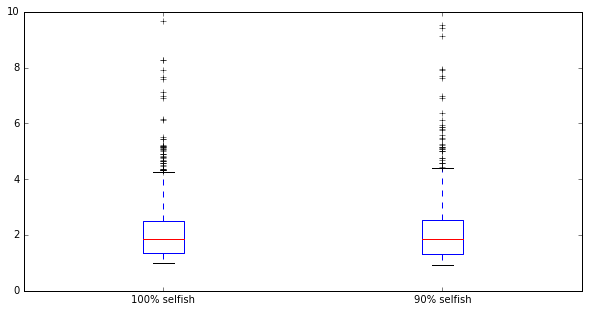

************
STATS
************
Average overhead for 100 percent selfish is 2.09296534756
Average overhead for 90 percent selfish is  2.09583591891
Average overhead for 90 percent selfish is  2.12185754461
************
Median overhead for 100 percent selfish is 1.84644666603
Median overhead for 90 percent selfish is  1.84324561549
Median overhead for 90 percent selfish is  1.84251236897
************
Variance of overhead for 100 percent selfish is 1.0460701668
Variance of overhead for 90 percent selfish is  1.07537050261
Variance of overhead for 90 percent selfish is  1.14052067508


In [27]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean, median, variance 
plt.rcParams['figure.figsize'] = [10, 5]
import pprint

def get_overheads(file_name):
    data = []
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            trip_duration = float(line[4])
            overhead = float(line[6])
            agent = line[7]
            preference = line[8].replace('\r', '').replace('\n', '')
            
            data.append(overhead)
    return data

overheads_100percent_selfish = get_overheads("data/overheads-1.csv")
overheads_90percent_selfish = get_overheads("data/overheads.csv")

plt.figure()
plt.boxplot([epos_100percent_selfish, epos_90percent_selfish], labels=["100% selfish", "90% selfish"])
plt.show()

print("************")
print("STATS")
print("************")
print("Average overhead for 100 percent selfish is % s" % (mean(overheads_100percent_selfish))) 
print("Average overhead for 90 percent selfish is  % s" % (mean(overheads_90percent_selfish))) 
print("************")
print("Median overhead for 100 percent selfish is % s" % (median(overheads_100percent_selfish))) 
print("Median overhead for 90 percent selfish is  % s" % (median(overheads_90percent_selfish))) 
print("************")
print("Variance of overhead for 100 percent selfish is % s" % (variance(overheads_100percent_selfish))) 
print("Variance of overhead for 90 percent selfish is  % s" % (variance(overheads_90percent_selfish))) 


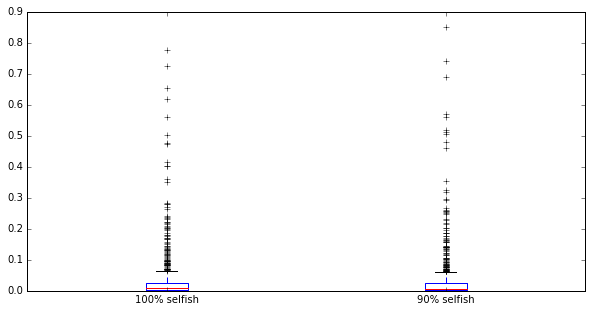

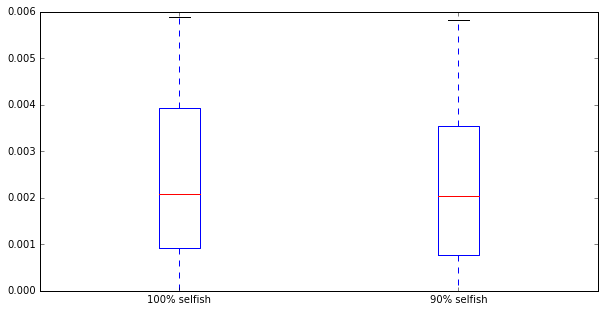

************
STATS
************
Average overhead for 100 percent selfish is 0.0280832360211
Average overhead for 90 percent selfish is  0.0279115383362
************
Median overhead for 100 percent selfish is 0.00757091064193
Median overhead for 90 percent selfish is  0.00725117437498
************
Variance of overhead for 100 percent selfish is 0.00454983744587
Variance of overhead for 90 percent selfish is  0.00476183279611


In [25]:
def get_utilizations(file_name):
    utilizations = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                edges = line
            else: 
                utilizations.append([float(u) for u in line[1:]])   
    
    streets_data = {}
    for i in range(len(edges)):
        streets_data[edges[i]] = [utilization[i] for utilization in utilizations]

    streets_utilizations = {}
    for key, value in streets_data.iteritems():
        streets_utilizations[key] = mean(value)
    
    return streets_utilizations

streets_100percent_selfish = get_utilizations("data/streets-1.csv")
streets_90percent_selfish = get_utilizations("data/streets.csv")

plt.figure()
plt.boxplot([streets_100percent_selfish.values(), streets_90percent_selfish.values()], labels=["100% selfish", "90% selfish"])
plt.show()

streets_100percent_selfish_smaller = sorted(streets_100percent_selfish.values())[:500]
streets_90percent_selfish_smaller = sorted(streets_90percent_selfish.values())[:500]

plt.figure()
plt.boxplot([streets_100percent_selfish_smaller, streets_90percent_selfish_smaller], labels=["100% selfish", "90% selfish"])
plt.show()

print("************")
print("STATS")
print("************")
print("Average overhead for 100 percent selfish is % s" % (mean(streets_100percent_selfish.values()))) 
print("Average overhead for 90 percent selfish is  % s" % (mean(streets_90percent_selfish.values()))) 
print("************")
print("Median overhead for 100 percent selfish is % s" % (median(streets_100percent_selfish.values()))) 
print("Median overhead for 90 percent selfish is  % s" % (median(streets_90percent_selfish.values()))) 
print("************")
print("Variance of overhead for 100 percent selfish is % s" % (variance(streets_100percent_selfish.values()))) 
print("Variance of overhead for 90 percent selfish is  % s" % (variance(streets_90percent_selfish.values()))) 